In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
path_data = "../01_data/facebook/"
path_report = "../03_report/problem_03/"
node_ids = np.array([0,107,348,414,686,698,1684,1912,3437,3980])
edges = np.empty([0,2])
G = []

for i in range(len(node_ids)):
    # gather edges for each node, appending edges between base node and sub-nodes
    edges_sub_nodes = np.loadtxt(path_data + "{}.edges".format(node_ids[i]))
    unique_nodes = np.unique(edges_sub_nodes)
    edges_from_ego_node = np.stack((np.full_like(unique_nodes, node_ids[i]), unique_nodes)).T
    edges_node_i = np.concatenate((edges_sub_nodes, edges_from_ego_node), axis=0)

    # append edges to global edge list
    edges = np.concatenate((edges, edges_node_i), axis=0)

    # append graph for individual ego-network
    G.append(nx.from_edgelist(edges_node_i, create_using=nx.Graph))

G_global = nx.from_edgelist(edges, create_using=nx.Graph)


In [8]:
len(G_global.nodes)

3963

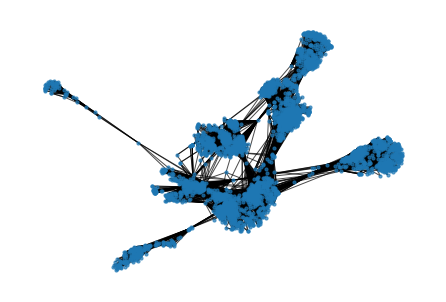

In [49]:
nx.draw(G_global, node_size=10, alpha=0.7)
plt.savefig(path_report+"facebook_network_global.png", dpi=300)


In [72]:
#comparing the ego nodes according degree
#nodes: [0,107,348,414,686,698,1684,1912,3437,3980]
degree_nodes_i = np.empty([10,2])
for i in range(len(node_ids)):
    degree_nodes_i[i, 0] = node_ids[i]
    degree_nodes_i[i, 1] = nx.degree(G_global)[node_ids[i]]

#np.sort(degree_nodes_i)
degree_nodes_i[np.argsort(degree_nodes_i[:,1])]

array([[3980.,   52.],
       [ 698.,   63.],
       [ 414.,  150.],
       [ 686.,  168.],
       [ 348.,  226.],
       [   0.,  333.],
       [3437.,  534.],
       [1912.,  747.],
       [1684.,  786.],
       [ 107., 1034.]])

In [23]:
degree = np.empty([len(G_global.nodes),2])
i=0
for node in nx.degree(G_global):
    degree[i,0] = node[0]
    degree[i,1] = node[1]
    i = i+1
degree[np.argsort(degree[:,1])][-10:]

array([[1663.,  235.],
       [1800.,  245.],
       [1888.,  254.],
       [2347.,  291.],
       [2543.,  294.],
       [   0.,  333.],
       [3437.,  534.],
       [1912.,  747.],
       [1684.,  786.],
       [ 107., 1034.]])

In [25]:
Hier stimmt etwas nicht, die Rechnung dauert > 15 min

eigenvector_centrality = degree
for i in range(len(eigenvector_centrality)):
    print(i, end="\r")
    eigenvector_centrality[i,1] = nx.algorithms.centrality.eigenvector_centrality(G_global)[eigenvector_centrality[i,0]]

KeyboardInterrupt: 

In [24]:
degree

array([[2.360e+02, 3.700e+01],
       [1.860e+02, 4.400e+01],
       [1.220e+02, 6.300e+01],
       ...,
       [3.987e+03, 2.000e+00],
       [4.006e+03, 2.000e+00],
       [3.980e+03, 5.200e+01]])